In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for model preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing library for model building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

import warnings as warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/iamlo/Downloads/Data_Science_Internship - Dump.csv",index_col=0)
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [3]:
df.shape

(46608, 15)

In [4]:
df.describe()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
count,46608,46608,43244,42908,44267,32970,46608,46608,46608,46608,46608,46608,46608,23061,46608
unique,120,6,30,1857,311,477,683,4336,186,35,64,220,15,5,30574
top,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,e741bdc636f2e99f2f83b31a64ff4b6d07f2b6a182d1cc...
freq,8186,43244,8892,9862,11111,2453,19306,8851,18812,31125,31761,7361,42674,12477,2


In [5]:
df.describe().T

,count,unique,top,freq
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46608,6,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42908,1857,£60 - £120 Per week,9862
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32970,477,10/09/22,2453
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


# Observation of given data:
1) shape of data: 46608 , 15
2) there is lots of data is missing. In room_type, there is more than 50% data are missing. We can't drop more than 50% of data , so we will try to drop columns having more than 35% missing values.

# Data Cleaning
1) First we check duplicates data then we removr it.
2) After removing duplicates, we will change '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' values to NAN.
3) We will try to convert columns 'status' value 'WON' = 1 and 'LOST' = 0.(Change the mapping of a column)
4) We will try to drop columns having 40% missing values.
5) We will try to drop rows having 70% missing values.
6) We will try to merge unique categories if they are multiples and  removing columns with highly skewed data..
7) We will impute the missing values.
8) Categorical with mode value. After that.
9) We will compare orginal with cleaned data.

In [7]:
df1 = df.drop_duplicates(keep = 'first')
df1.shape

(46598, 15)

In [8]:
df1 = df1[(df1['status'] == 'WON') | (df1['status'] == 'LOST')]
df1['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

In [9]:
df1['status'] = df1['status'].map({'WON':1, 'LOST':0})
df1['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [10]:
df1.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NAN, inplace=True)
df1.head(3)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...


In [11]:
def rmissingvaluecol(dff, threshold):
    col = []
    col = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((dff.columns.values))) - set(col)))
    return col

# Removing columns having 40% missing values
col = rmissingvaluecol(df1, 40)
df1 = df1[col]
df1.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [12]:
perc = 50.0 
min_count =  int(((100-perc)/100)*df1.shape[1] + 1)
df1 = df1.dropna(axis=0, thresh=min_count)
df1.shape

(45895, 14)

In [13]:
column_names = df1.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(df1[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.389694
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.148491
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.771544
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.401133
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.309620
                                                                      ...    
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002179
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a     0.002179
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002179
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002179
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002179
Name: Agent_id, Length: 120, dtype: float64


Column Name        : st

In [14]:
skewed_columns_to_be_dropped = ['des_country','lead_id']

df1.drop(skewed_columns_to_be_dropped, axis=1, inplace=True)
df1.shape

(45895, 12)

In [15]:
round(df1.isnull().sum() * 100 / len(df1), 2)

Agent_id           0.00
status             0.00
lost_reason        6.66
budget             7.14
lease              4.33
movein            28.76
source            12.09
source_city       18.32
source_country    17.87
utm_source         0.13
utm_medium         6.89
des_city           4.63
dtype: float64

In [16]:
categorical_column_names = ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 'des_city','utm_source','utm_medium']
for column_name in categorical_column_names:
    print("Column Name        :", column_name)
    print("------------------------------")
    #print("Unique Values      : ", leads_modified_df[column_name].unique())
    
    values_to_be_imputed = df1[column_name].isnull().sum()
    print("Any Null (Before)  :", values_to_be_imputed)
    
    df1[column_name].fillna(df1[column_name].mode()[0], inplace=True)
    print(values_to_be_imputed, " values imputed with mode values of the column.")
    
    print("Null Values (After):", df1[column_name].isnull().sum())
    print('\n')

Column Name        : lost_reason
------------------------------
Any Null (Before)  : 3057
3057  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : budget
------------------------------
Any Null (Before)  : 3276
3276  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : lease
------------------------------
Any Null (Before)  : 1986
1986  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : movein
------------------------------
Any Null (Before)  : 13201
13201  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source
------------------------------
Any Null (Before)  : 5548
5548  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source_city
------------------------------
Any Null (Before)  : 8409
8409  values imputed with mode values of the column.
Null Values (After): 0


Column Name

In [17]:
column_names = df1.columns

for column_name in column_names:
    print("Column Name        :", column_name)
    print("-----------------------------------------------------")
    print(df1[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
-----------------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.389694
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.148491
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.771544
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.401133
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.309620
                                                                      ...    
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002179
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a     0.002179
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002179
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002179
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002179
Name: Agent_id, Length: 120, dtype: float64


Column Name 

In [18]:
# Changing categories with lesser percentage to 'others'
def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = df1.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = df1[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')

    df1[column_name] = df1[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    value_counts_df = df1[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.389694
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.148491
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.771544
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.401133
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.309620
                                                                      ...    
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002179
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a     0.002179
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002179
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002179
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002179
Name: Agent_id, Length: 120, dtype: float64


After :
others       

After :
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    58.540146
others                                                              26.305698
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    15.154156
Name: source_country, dtype: float64


Column Name :  utm_source
-----------------------------------------
Before :
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3    67.401678
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    10.336638
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3     3.793442
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     3.497113
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579     3.322802
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7     2.723608
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1     2.276936
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158     1.876021
44574c4ba2ea74ad4b

In [19]:
df1 = df1.dropna()

In [20]:
# Verifying various parameters after cleaning
print("Before Cleaning Data")
print("*********************************")
print("Shape: ", df.shape)
print("Missing:")
print("-----------------------")
print(round(df.isnull().sum()*100/len(df), 2))

print('\n')
print("After Cleaning Data")
print("*********************************")
print("Shape: ", df1.shape)
print("Missing:")
print("-----------------------")
print(round(df1.isnull().sum()*100/len(df1), 2))

Before Cleaning Data
*********************************
Shape:  (46608, 15)
Missing:
-----------------------
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source             0.00
source_city        0.00
source_country     0.00
utm_source         0.00
utm_medium         0.00
des_city           0.00
des_country        0.00
room_type         50.52
lead_id            0.00
dtype: float64


After Cleaning Data
*********************************
Shape:  (45895, 12)
Missing:
-----------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
dtype: float64


# Data Preparation
1) We will create dummies for categorical columns.
2) We will split data into train-test set.
3) We will perform scaling.

In [21]:
column_names = ['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']

for column_name in column_names:
    dummies = pd.get_dummies(df1[column_name])
    dummies.drop('others', axis=1, inplace=True)
    df1 = pd.concat([df1, dummies], axis=1)
    df1.drop(column_name, axis=1, inplace=True)
    print("Dummies created for: ", column_name)

df1.head()

Dummies created for:  Agent_id
Dummies created for:  lost_reason
Dummies created for:  budget
Dummies created for:  lease
Dummies created for:  movein
Dummies created for:  source
Dummies created for:  source_city
Dummies created for:  source_country
Dummies created for:  utm_source
Dummies created for:  utm_medium
Dummies created for:  des_city


,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,...,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [22]:
# Putting feature variable to X
X = df1.drop('status', axis=1)

X.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0


In [23]:
# Putting response variable to y
y = df1.status
y.head()

0    0
1    0
2    0
3    0
5    0
Name: status, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

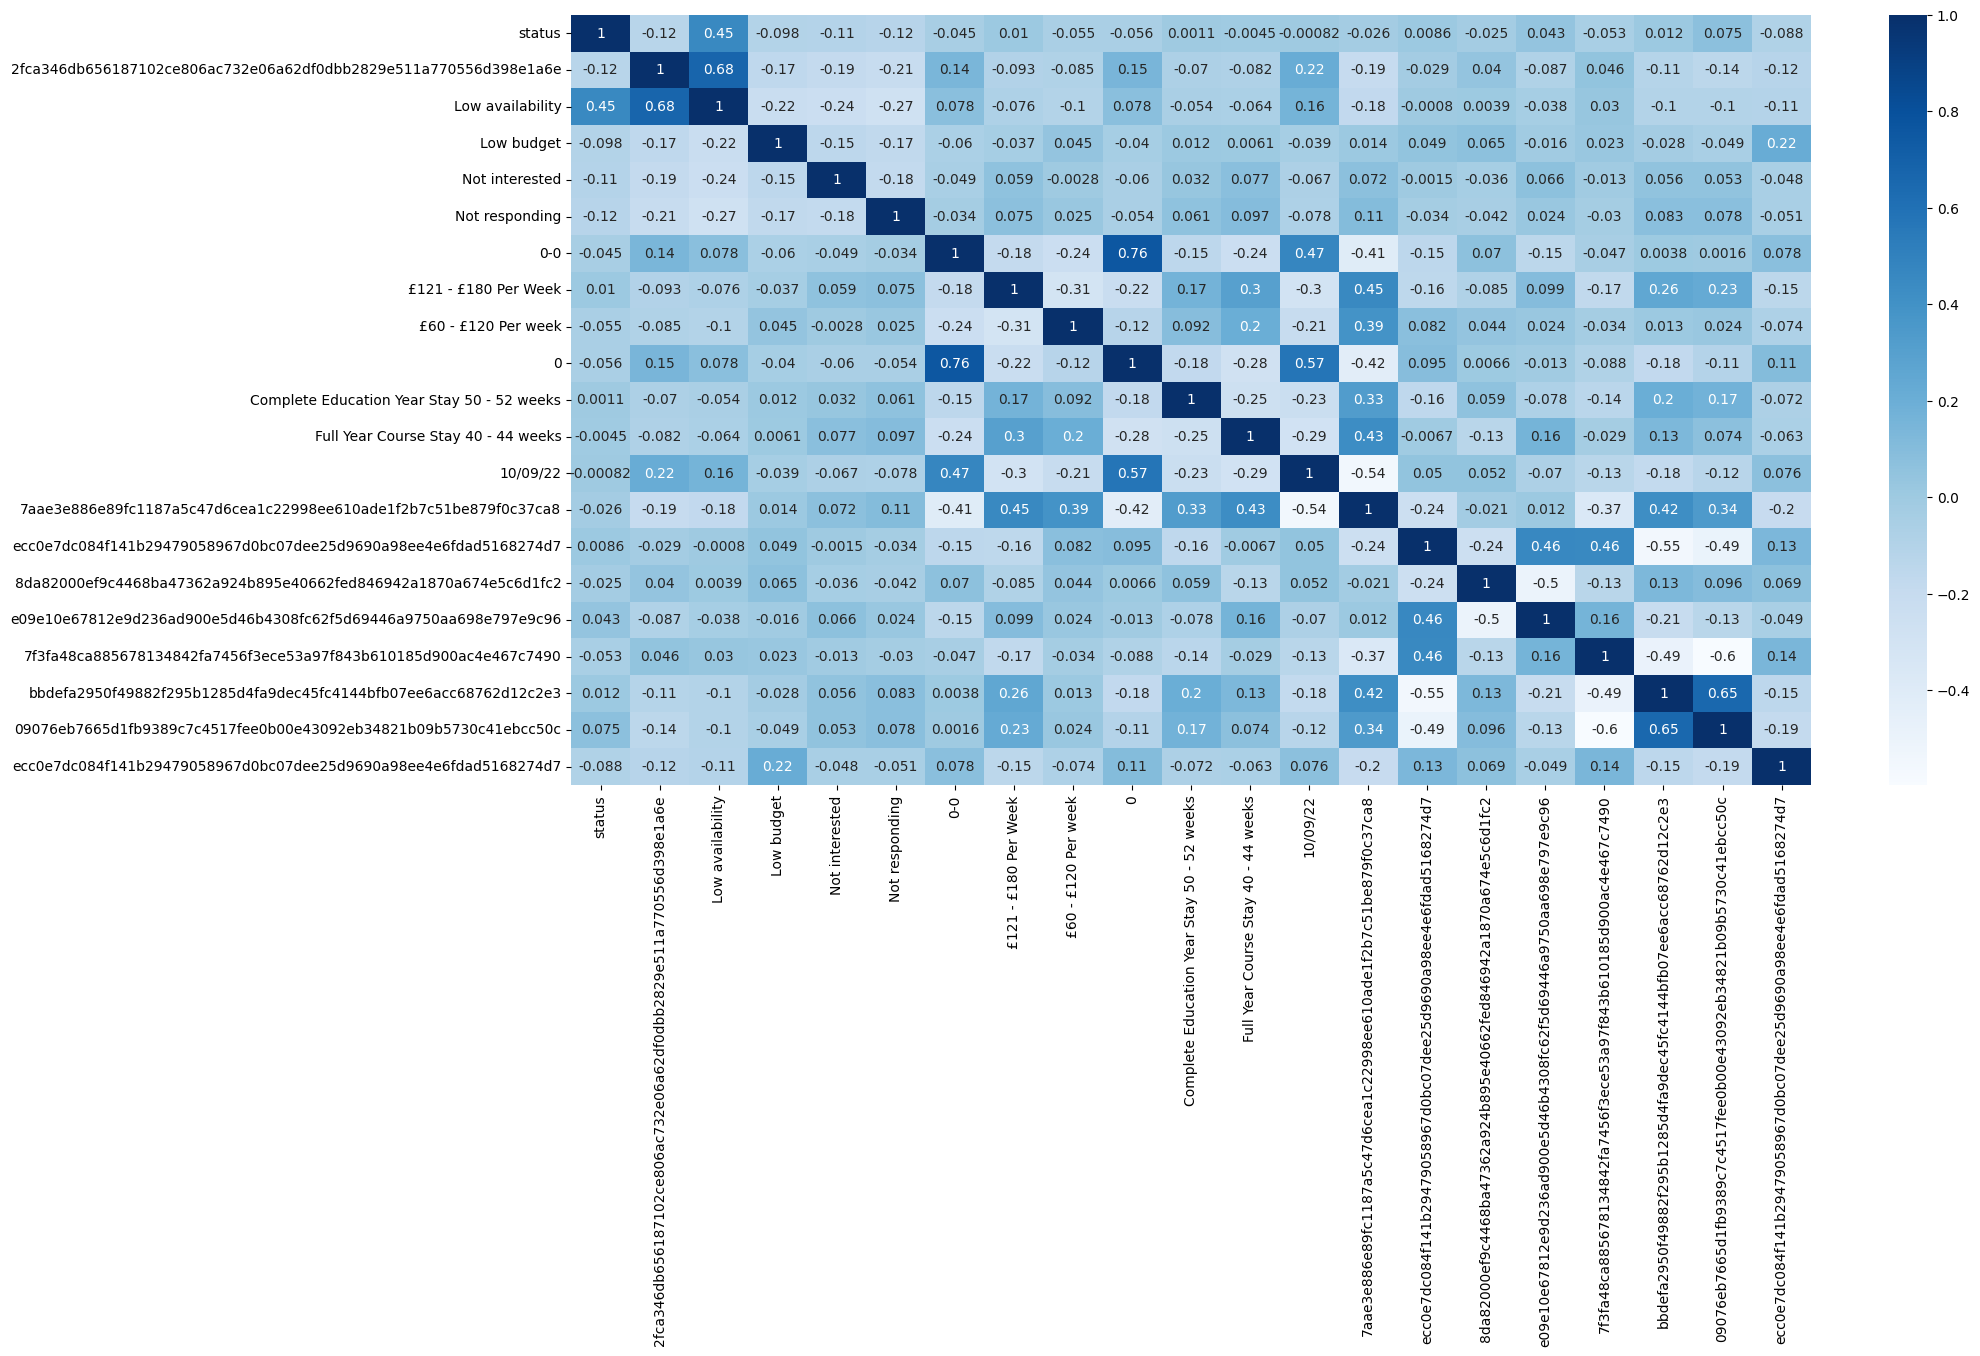

In [25]:
# correlation matrix 
plt.figure(figsize = (20,10)) 
sns.heatmap(df1.corr(), annot = True, cmap="Blues")
plt.show()


# Model Building

1) We will try to build our first.
2) We will use RFE to know how much parameters can be considered.
3) We will iteratively remove columns either having high p or VIF.# 

In [26]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32126
Model:                            GLM   Df Residuals:                    32105
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1468.9
Date:                Tue, 14 Mar 2023   Deviance:                       2937.8
Time:                        09:39:03   Pearson chi2:                 3.31e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3291
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -31.1085   2.41e+04     -0.001      0.999   -4.73e+04    4.72e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.7081   3.16e+04     -0.001      0.999    -6.2e+04    6.19e+04
Low availability                                                    31.6365   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
Low budget                                                           0.3072   4.52e+04   6.79e-06      1.000   -8.87e+04    8.87e+04
Not interested                                                      -0.3545   4.45e+04  -7.96e-06      1.000   -8.73e+04    8.73e+04
Not responding                                                      -0.3029   4.17e+04  -7.27e-06      1.000   -8.17e+04    8.17e+04
0-0                                                                 -0.6568      0.255     -2.579      0.010      -1.156      -0.158
£121 - £180 Per Week                                                -0.0938      0.170     -0.553      0.580      -0.426       0.239
£60 - £120 Per week                                                 -0.3126      0.149     -2.092      0.036      -0.606      -0.020
0                                                                   -0.6757      0.238     -2.843      0.004      -1.142      -0.210
Complete Education Year Stay 50 - 52 weeks                           0.2834      0.171      1.654      0.098      -0.052       0.619
Full Year Course Stay 40 - 44 weeks                                  0.2456      0.146      1.684      0.092      -0.040       0.531
10/09/22                                                             0.1824      0.134      1.356      0.175      -0.081       0.446
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.7756      0.176     -4.411      0.000      -1.120      -0.431
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.0933      0.154      0.605      0.545      -0.209       0.395
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.0538      0.149     -0.362      0.718      -0.346       0.238
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.6057      0.123      4.938      0.000       0.365       0.846
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    -0.3620      0.230     -1.572      0.116      -0.814       0.089
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     0.1648      0.130      1.269      0.205      -0.090       0.419
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.1890      0.139      8.578      0.000       0.917       1.461
ecc0e7dc084f141b29479058

In [27]:
# Initializing LogisticRegression
logreg = LogisticRegression()

# Running RFE with 17 variables as output
rfe = RFE(logreg, step=17)             
rfe = rfe.fit(X_train, y_train)

# Listing the columns
for i in list(zip(X_train.columns, rfe.support_, rfe.ranking_)):
    print(i)

('2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e', True, 1)
('Low availability', True, 1)
('Low budget', True, 1)
('Not interested', True, 1)
('Not responding', True, 1)
('0-0', True, 1)
('£121 - £180 Per Week', False, 2)
('£60 - £120 Per week', False, 2)
('0', True, 1)
('Complete Education Year Stay 50 - 52 weeks', False, 2)
('Full Year Course Stay 40 - 44 weeks', False, 2)
('10/09/22', False, 2)
('7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8', True, 1)
('ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7', False, 2)
('8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2', False, 2)
('e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96', False, 2)
('7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490', False, 2)
('bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3', False, 2)
('09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c', True, 1)
('ecc0e7dc084f141b29479058967d

In [28]:
# Listing down the columns important for building a model
col = X_train.columns[rfe.support_]
col

Index(['2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e',
       'Low availability', 'Low budget', 'Not interested', 'Not responding',
       '0-0', '0',
       '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'],
      dtype='object')

In [29]:
# Listing down the columns not important
z = X_train.columns[~rfe.support_]
z

Index(['£121 - £180 Per Week', '£60 - £120 Per week',
       'Complete Education Year Stay 50 - 52 weeks',
       'Full Year Course Stay 40 - 44 weeks', '10/09/22',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7',
       '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
       'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
       '7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490',
       'bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3'],
      dtype='object')

In [30]:
# Building our second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32126
Model:                            GLM   Df Residuals:                    32114
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1494.8
Date:                Tue, 14 Mar 2023   Deviance:                       2989.7
Time:                        09:39:03   Pearson chi2:                 3.32e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3280
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.8312   2.43e+04     -0.001      0.999   -4.76e+04    4.75e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6721   3.19e+04     -0.001      0.999   -6.25e+04    6.24e+04
Low availability                                                    31.6388   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
Low budget                                                           0.2950   4.55e+04   6.48e-06      1.000   -8.92e+04    8.92e+04
Not interested                                                      -0.2535   4.48e+04  -5.65e-06      1.000   -8.79e+04    8.79e+04
Not responding                                                      -0.2243   4.19e+04  -5.35e-06      1.000   -8.22e+04    8.22e+04
0-0                                                                 -0.6830      0.241     -2.833      0.005      -1.155      -0.211
0                                                                   -0.5720      0.209     -2.739      0.006      -0.981      -0.163
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.7214      0.112     -6.423      0.000      -0.942      -0.501
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.3821      0.121     11.378      0.000       1.144       1.620
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.2709      0.124      2.192      0.028       0.029       0.513
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -2.7534      0.108    -25.469      0.000      -2.965      -2.542
====================================================================================================================================
"""

In [31]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train

44150    0
45807    0
46232    0
33847    0
42268    0
        ..
16556    0
83       0
12311    0
14374    0
38988    0
Name: status, Length: 32126, dtype: int64

In [32]:
# Forming prediction table
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,1.059837e-13,44150
1,0,3.942291e-14,45807
2,0,7.890695e-14,46232
3,0,8.505908e-01,33847
4,0,4.270200e-14,42268


In [33]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,1.059837e-13,44150,0
1,0,3.942291e-14,45807,0
2,0,7.890695e-14,46232,0
3,0,8.505908e-01,33847,1
4,0,4.270200e-14,42268,0


In [34]:
# Getting the predicted values on the train set
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score
0,0,1.059837e-13,44150,0,0
1,0,3.942291e-14,45807,0,0
2,0,7.890695e-14,46232,0,0
3,0,8.505908e-01,33847,1,85
4,0,4.270200e-14,42268,0,0


In [35]:
y_train_pred_final['Lead_Score'].value_counts()

0     28852
81     1031
90      484
92      256
22      190
16      172
72      148
85      124
36      114
75      104
69       91
13       76
14       54
4        48
43       42
8        36
39       35
62       32
30       31
52       29
59       29
10       25
87       20
27       16
6        15
5        13
77       11
53       11
82       11
18       10
45        7
76        3
83        2
56        1
86        1
60        1
24        1
Name: Lead_Score, dtype: int64

In [36]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29557   423]
 [  180  1966]]


In [37]:
# overall report.
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29980
           1       0.82      0.92      0.87      2146

    accuracy                           0.98     32126
   macro avg       0.91      0.95      0.93     32126
weighted avg       0.98      0.98      0.98     32126



In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,0-0,0.15
0,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.07
6,0,0.07
3,Not interested,0.05
1,Low availability,0.04
10,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.04
4,Not responding,0.03
8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,0.03
2,Low budget,0.02
9,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.02


# Model Assessment
1) We will draw ROC curve.
2) We will create data with different probabilities.
3) We will plot a graph for 'accuracy','sensitivity' and 'specificity'.

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [40]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

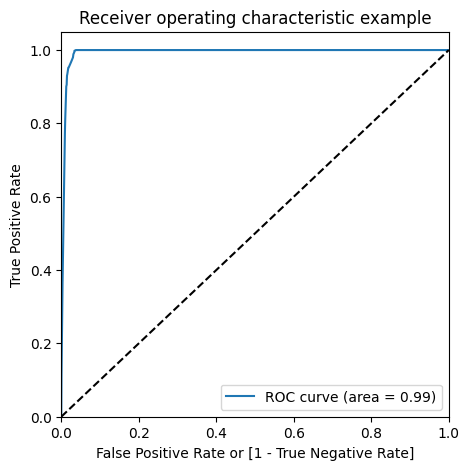

In [41]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [42]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.059837e-13,44150,0,0,1,0,0,0,0,0,0,0,0,0
1,0,3.942291e-14,45807,0,0,1,0,0,0,0,0,0,0,0,0
2,0,7.890695e-14,46232,0,0,1,0,0,0,0,0,0,0,0,0
3,0,8.505908e-01,33847,1,85,1,1,1,1,1,1,1,1,1,0
4,0,4.270200e-14,42268,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.066799  1.000000  0.000000
0.1   0.1  0.968343  0.993942  0.966511
0.2   0.2  0.974382  0.966449  0.974950
0.3   0.3  0.979861  0.952004  0.981855
0.4   0.4  0.981573  0.930103  0.985257
0.5   0.5  0.981230  0.916123  0.985891
0.6   0.6  0.981324  0.900280  0.987125
0.7   0.7  0.979736  0.859739  0.988326
0.8   0.8  0.975938  0.769338  0.990727
0.9   0.9  0.940049  0.110904  0.999400


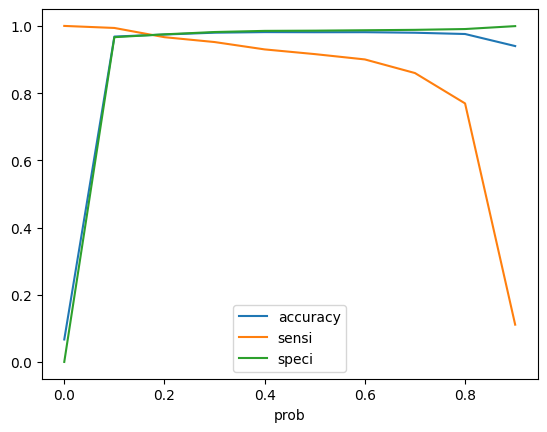

In [44]:
# plot accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [45]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.059837e-13,44150,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,3.942291e-14,45807,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,7.890695e-14,46232,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,8.505908e-01,33847,1,85,1,1,1,1,1,1,1,1,1,0,1
4,0,4.270200e-14,42268,0,0,1,0,0,0,0,0,0,0,0,0,0


In [46]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29557   423]
 [  180  1966]]


In [47]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [48]:
# Accuracy - Measures of Accuracy
# Describes overall, how often the classifier correct.
(TP+TN)/(TP+TN+FP+FN)

0.9812301562597273

In [49]:
# Sensitivity/Recall - When it’s actually yes, how often does it predict yes?
TP/(TP+FN)

0.9161230195712954

In [50]:
# Specificity - When it’s actually no, how often does it predict no?
TN/(TN+FP)

0.9858905937291528

In [51]:
# Precision - When it predicts yes, how often is it correct?
TP/(TP+FP)

0.8229384679782336

In [52]:
# overall accuracy.
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29980
           1       0.82      0.92      0.87      2146

    accuracy                           0.98     32126
   macro avg       0.91      0.95      0.93     32126
weighted avg       0.98      0.98      0.98     32126



In [53]:
metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9161230195712954

In [54]:
metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9161230195712954

In [55]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

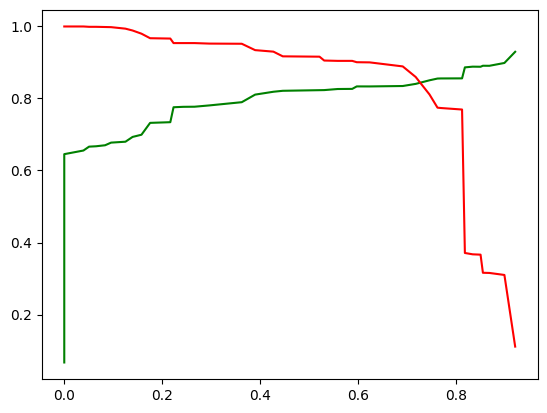

In [56]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


# Making predictions on the test dataset

In [57]:
X_test = X_test[col]
X_test.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
7439,0,0,0,0,0,0,0,1,1,0,0
28647,0,0,1,0,0,0,0,1,1,0,1
42189,0,0,1,0,0,0,1,0,1,1,1
37007,0,0,0,0,0,0,0,1,1,0,0
15988,0,0,1,0,0,0,0,0,0,1,0


In [58]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7439     7.890695e-14
28647    6.752029e-15
42189    1.028032e-14
37007    7.890695e-14
15988    7.177464e-14
12067    7.890695e-14
4813     2.580810e-15
13225    6.305453e-14
7044     7.890695e-14
25450    2.720467e-15
dtype: float64

In [59]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7439,7.890695e-14
28647,6.752029e-15
42189,1.028032e-14
37007,7.890695e-14
15988,7.177464e-14


In [60]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,status,LeadId,0
0,0,7439,7.890695e-14
1,0,28647,6.752029e-15
2,0,42189,1.028032e-14
3,0,37007,7.890695e-14
4,0,15988,7.177464e-14


In [61]:
y_pred_final['status'].value_counts()

0    12858
1      911
Name: status, dtype: int64

In [62]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','status','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,status,Converted_Prob
0,7439,0,7.890695e-14
1,28647,0,6.752029e-15
2,42189,0,1.028032e-14
3,37007,0,7.890695e-14
4,15988,0,7.177464e-14


In [63]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,LeadId,status,Converted_Prob,final_predicted,Lead_Score
0,7439,0,7.890695e-14,0,0
1,28647,0,6.752029e-15,0,0
2,42189,0,1.028032e-14,0,0
3,37007,0,7.890695e-14,0,0
4,15988,0,7.177464e-14,0,0


In [64]:
metrics.confusion_matrix(y_pred_final.status, y_pred_final.final_predicted)

array([[12633,   225],
       [   30,   881]], dtype=int64)

In [65]:
print(metrics.classification_report(y_pred_final.status, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12858
           1       0.80      0.97      0.87       911

    accuracy                           0.98     13769
   macro avg       0.90      0.97      0.93     13769
weighted avg       0.98      0.98      0.98     13769



# Conclusion :
1) Accuracy : 98.12301562597273%
2) Sensitivity : 91.61230195712954%
3) Specificity : 98.58905937291528%
4) Precision : 82.29384679782336%